Enter the Search Algorithm (1 FOR BFS)(2 FOR DFS)(3 FOR BEST FS):  3
Enter the Start Node:  B
Enter the Goal Node:  G


Path from B to G found: B -> C -> E -> G


{('A', 'B'): Text(0.062289153313982, -0.33057410636263784, '5'),
 ('B', 'C'): Text(-0.10125820457478946, -0.004445184511451872, '3'),
 ('B', 'D'): Text(0.39806800009426246, -0.21257515750084416, '2'),
 ('C', 'E'): Text(-0.47323848732694573, 0.2985402715696013, '4'),
 ('D', 'F'): Text(0.8470291900630655, -0.2757629033078789, '6'),
 ('E', 'G'): Text(-0.7570213287710617, 0.5242388757720658, '7')}

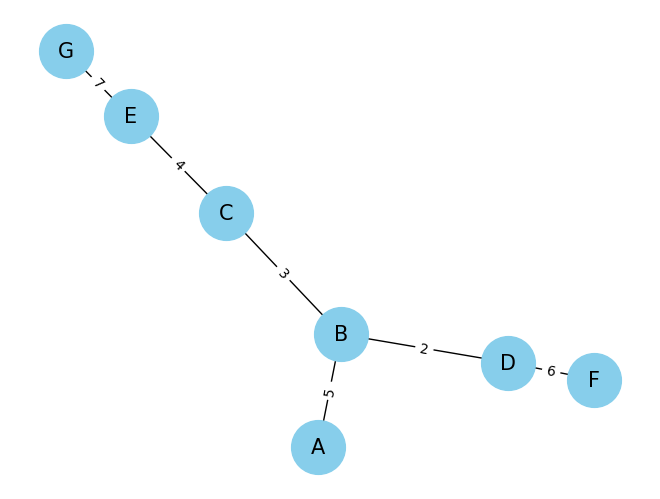

In [21]:
# NAME:SHERALI
# ROLL NO: P21-8024

import networkx as nx
from collections import deque
import math
import queue

def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])
    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    return None

def dfs(graph, start, goal):
    visited = set()
    
    def dfs_recursive(node, path):
        if node == goal:
            return path
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_path = dfs_recursive(neighbor, path + [neighbor])
                if new_path:
                    return new_path
        return None
    return dfs_recursive(start, [start])

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((heuristic[start], [start]))  # Initial state

    while not pri_queue.empty():
        heuristic_current, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))

    return []  # Goal not found

G = nx.Graph()
G.add_weighted_edges_from([('A', 'B', 5), ('B', 'C', 3), ('B', 'D', 2), ('C', 'E', 4), ('D', 'F', 6), ('E', 'G', 7)])

# Define the heuristic function as a dictionary
heuristic = {
    'A': 2,
    'B': 1,
    'C': 3,
    'D': 2,
    'E': 4,
    'F': 3,
    'G': 5
}

choose_Algo = int(input("Enter the Search Algorithm (1 FOR BFS)(2 FOR DFS)(3 FOR BEST FS): "))

if (choose_Algo == 1):
    start_node = input("Enter the Start Node: ")
    goal_node = input("Enter the Goal Node: ")
    path = bfs(G, start_node, goal_node)
    
    if path:
        print(f"BFS path from node {start_node} to node {goal_node}: {path}")
    else:
        print(f"No path found from node {start_node} to node {goal_node}.")

elif (choose_Algo == 2): 
    start_node = input("Enter the Start Node: ")
    goal_node = input("Enter the Goal Node: ")
    
    path = dfs(G, start_node, goal_node)
    
    if path:
        print(f"DFS path from node {start_node} to node {goal_node}: {path}")
    else:
        print(f"No path found from node {start_node} to node {goal_node}.")

elif (choose_Algo == 3):
    start_node = input("Enter the Start Node: ")
    goal_node = input("Enter the Goal Node: ")
   
    path = best_first_search(G, start_node, goal_node, heuristic)
    if path:
        print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
    else:
        print("No path found from {} to {}".format(start_node, goal_node))

# Compute the layout of the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
